In [1]:
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

import numpy as np
import matplotlib.pyplot as plt
import cv2

import os
from os import listdir
from os.path import isfile, join

path = os.getcwd() + '/'
path_images = path + '1. Data/FASSEG-frontal03/Original/'
images = [img for img in listdir(path_images) if isfile(join(path_images, img))]

# Import image

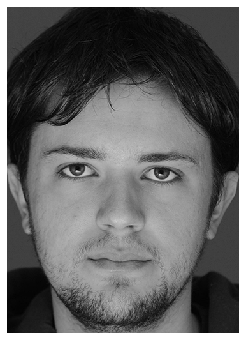

In [145]:
idx_image = 2

plt.figure(figsize=(10,6))
image = cv2.imread(path_images+images[idx_image])
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Snake (active contour segmentation)

/Users/Maxime/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.


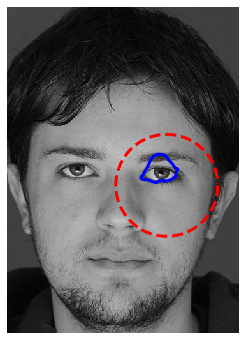

In [146]:
def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T

# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [280, 250], 80)[:-1]
snake = seg.active_contour(image, points, alpha=0.2, beta=0.6)

plt.figure(figsize=(10,6))

plt.imshow(image, cmap='gray')
plt.plot(points[:, 0], points[:, 1], '--r', lw=3)
plt.plot(snake[:, 0], snake[:, 1], '-b', lw=3)

plt.axis('off')
plt.show()

# SLIC (Simple Linear Iterative Clustering)

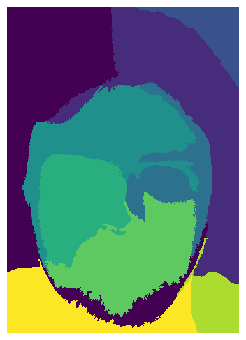

In [159]:
image = cv2.imread(path_images+images[idx_image])
image_slic = seg.slic(image,n_segments=15)

plt.figure(figsize=(10,6))
plt.imshow(image_slic)
plt.axis('off')
plt.show()

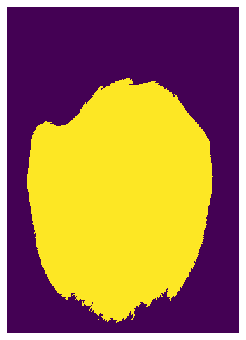

In [160]:
image = cv2.imread(path_images+images[idx_image])
image_slic = seg.slic(image,n_segments=2)

plt.figure(figsize=(10,6))
plt.imshow(image_slic)
plt.axis('off')
plt.show()

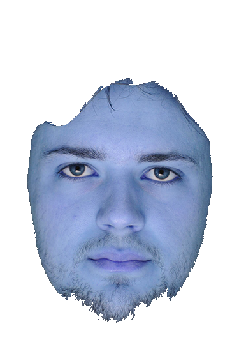

In [148]:
image_slic = 1 - image_slic

superposition = np.zeros(image.shape)
superposition[:,:,0] = image[:,:,0] + 255*image_slic
superposition[:,:,1] = image[:,:,1] + 255*image_slic
superposition[:,:,2] = image[:,:,2] + 255*image_slic
superposition = np.clip(superposition,0,255)
superposition = (superposition - superposition.min()) / (superposition.max() - superposition.min()) 

plt.figure(figsize=(10,6))
plt.imshow(superposition)
plt.axis('off')
plt.show()

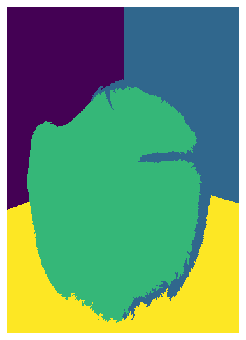

In [155]:
image_slic2 = seg.slic(superposition,n_segments=5)

plt.figure(figsize=(10,6))
plt.imshow(image_slic2)
plt.axis('off')
plt.show()

# Inverse gaussian gradient

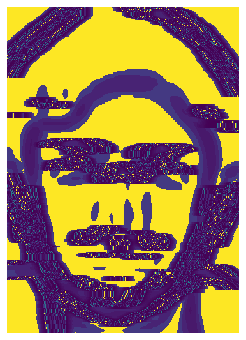

In [171]:
image = cv2.imread(path_images+images[idx_image])
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,6))

IGG = seg.inverse_gaussian_gradient(image, alpha=20, sigma=10)
plt.imshow(IGG)

plt.axis('off')
plt.show()

# Chan vese

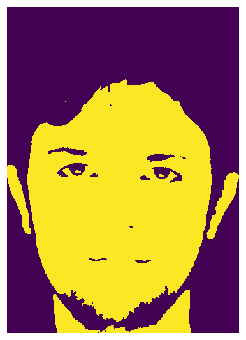

In [179]:
image = cv2.imread(path_images+images[idx_image])
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,6))

CV = seg.chan_vese(image, mu=0.05)
plt.imshow(CV)

plt.axis('off')
plt.show()

# Morphological chan vese

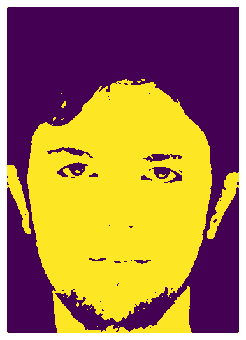

In [189]:
image = cv2.imread(path_images+images[idx_image])
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,6))

MCV = seg.morphological_chan_vese(image, iterations=5)
plt.imshow(1 - MCV)

plt.axis('off')
plt.show()

# Quickshift

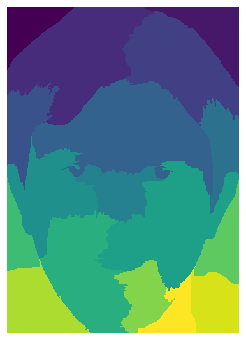

In [204]:
image = cv2.imread(path_images+images[idx_image])

plt.figure(figsize=(10,6))

QS = seg.quickshift(image, max_dist=80, kernel_size=10, ratio=0.8, sigma=1)
plt.imshow(QS)

plt.axis('off')
plt.show()